Prompt 1 (en caso de ser necesario): Genera una metodología general, pero efectiva y con rigor para aplicar correctamente X

Prompt 2: Genera un ejercicio para aplicar X. Las características del ejercicio son:

- No pongas objetivos muy extensos (considera que el ejercicio debe de ser didáctico y enfocado en aplicar la técnica correspondiente)
- Genera el enunciado correspondiente con los entregables esperados
- Dame la solución conceptual o en código según sea el caso. La solución en código debe estar en una sola celda y organizada





Estructura del trabajo:

Cada subtema tiene una breve descripción o recordatorio del funcionamiento de la técnica y enseguida se hace un ejercicio de aplicación (no todos tienen ejercicio y o explicación)

# 1.- Medir el sobreajuste e infrajuste 



## Explicación

Sabemos que entrenar un modelo de aprednizaje automático puede sufrir de sobreajuste y subajuste. Cunado decimos que un algoritmo aprende con un modelo matematico a traves de los datos en realidad se traduce simplemente a encontrar parametros o coeficientes de un modelo o estructura matematica (ya sea parametrico o no parametrico). Es decir, en el fondo se hace reduce a hacer un problema de optimización matematica.

- El sobreajuste se refiere a cuando un algorítmo se ajusta tan bien a los datos que es incapaz de hacer buenas predicciones. Análogo a cuando un estudiante memoriza un tema o proceso y en el examen no sabe que hacer con un ejercicio ligeramente diferente. 
    
Las formas de resolverlo son:

        - Disminuir la complejidad del modelo con regularización o utilizar un modelo más robusto

- El subajuste es cuando un algoritmo no se logra ajustar a los datos

Las formas de resolverlo son:

        - Aumentar la complejidad del modelo o añadir más datos o características 



Matemáticamente:

El error en ML se suele descomponer como:

$$\text{Error Total} = \text{Error de entrenamiento} + \text{Error de generalización}$$

de forma más rigurosa:

$$\mathbb{E}[(\hat{f}(x) - f(x))^2] = \text{Sesgo}^2 + \text{Varianza} + \text{ruido irreducible}$$


- $\hat{f}(x) = \text{predicción del modelo}.$
- $f(x) = \text{relación verdadera entre variables}.$
- E es el error esperado

En términos matemáticos y generales

- Sobreajuste = sesgo pequeño, varianza grande. o bien error bajo en entrenamiento y alto en prueba

- Subajuste = sesgo grande, varianza pequeña. o bien error alto en entrenamiento y alto en prueba



## Ejercicio 1

Una empresa desea predecir la cantidad de ventas mensuales (en miles de unidades) a partir del presupuesto en publicidad digital (en miles de dólares). Te han proporcionado un conjunto de datos históricos y desean que construyas un modelo que:

1. Analice si hay infraajuste, buen ajuste o sobreajuste según el grado del polinomio utilizado.
2. Evalúe el desempeño del modelo en entrenamiento y prueba.
3. Grafique la relación real y las curvas ajustadas para distintos grados polinómicos.

Objetivos / Entregables esperados:

- Entrenar tres modelos de regresión polinómica: grados 1 (lineal), 2 y 10.

- Calcular el error MSE (Error Cuadrático Medio) en entrenamiento y prueba.

- Interpretar los resultados: ¿Qué modelo tiene sobreajuste? ¿Cuál infraajuste?

- Graficar los tres modelos sobre los datos reales.

In [ ]:
#data
import numpy as np       # Importa NumPy, una biblioteca para cálculos numéricos eficientes, ¡piensa en ella como una calculadora gigante para arreglos!
import pandas as pd      # Importa Pandas, una biblioteca para manejar y analizar datos en tablas, ¡como hojas de cálculo en Python!
import matplotlib.pyplot as plt # Importa Matplotlib para crear gráficos y visualizaciones, ¡perfecto para dibujar lo que representan tus datos!

# Semilla para reproducibilidad
np.random.seed(42)       # Fija la "semilla" para los números aleatorios, ¡así siempre obtendrás los mismos resultados aleatorios cada vez que ejecutes el código!

# Generar datos ficticios
X = np.linspace(0, 10, 30) # Crea un conjunto de 30 números espaciados uniformemente entre 0 y 10, ¡estos serán nuestros datos de "publicidad"!
y = 3*X**2 - 2*X + 5 + np.random.normal(0, 10, size=X.shape) # Calcula los "ingresos" (y) usando una fórmula basada en "publicidad" (X) y añade un poco de "ruido" aleatorio para que se vea más real.

data = pd.DataFrame({'Publicidad': X, 'Ventas': y}) # Combina nuestros datos de "publicidad" (X) y "ventas" (y) en una tabla de Pandas, ¡como organizar tus datos en columnas con nombres!
data.to_csv("ventas_publicidad.csv", index=False) # Guarda esta tabla de datos en un archivo CSV llamado "ventas_publicidad.csv" sin añadir un índice de fila, ¡para que puedas usarla más tarde en otros programas!

c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


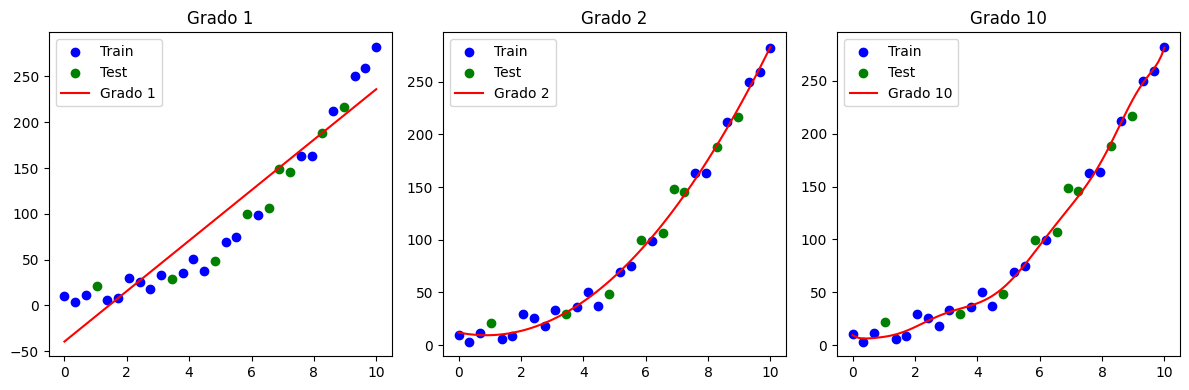

Grado 1 → MSE train: 822.22, MSE test: 646.23
Grado 2 → MSE train: 46.49, MSE test: 103.20
Grado 10 → MSE train: 31.97, MSE test: 121.87


In [2]:
#solucion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Cargar datos
X = data[['Publicidad']]
y = data['Ventas']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Lista de grados a probar
grados = [1, 2, 10]

# Almacenar errores
errores = []

# Gráfico
plt.figure(figsize=(12, 4))

for i, grado in enumerate(grados, 1):
    poly = PolynomialFeatures(degree=grado)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    errores.append((grado, mse_train, mse_test))

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='green', label='Test')

    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot, color='red', label=f"Grado {grado}")
    plt.title(f"Grado {grado}")
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar errores
for g, e_tr, e_te in errores:
    print(f"Grado {g} → MSE train: {e_tr:.2f}, MSE test: {e_te:.2f}")


El principio que debemos seguir para medir el sobreajuste y subajuste es: 

- Si el error en entrenamiento es bajo, pero en prueba es alto, hay sobreajuste (overfitting).

- Si el error en entrenamiento es alto y también es alto en prueba, hay subajuste (underfitting).

- Si el error es bajo y similar en ambos conjuntos (entrenamiento y prueba), no hay sobreajuste ni subajuste; el modelo generaliza bien.

- En el gráfico 1 podemos observar un subajuste
- En el gráfico 2 podemos observar que no hay ni sobre ajuste ni sub ajuste
- En el gráfico 3 podemos observar un sobreajuste

Aquí podemos concluir que el modelo con 2 grados es el óptimo

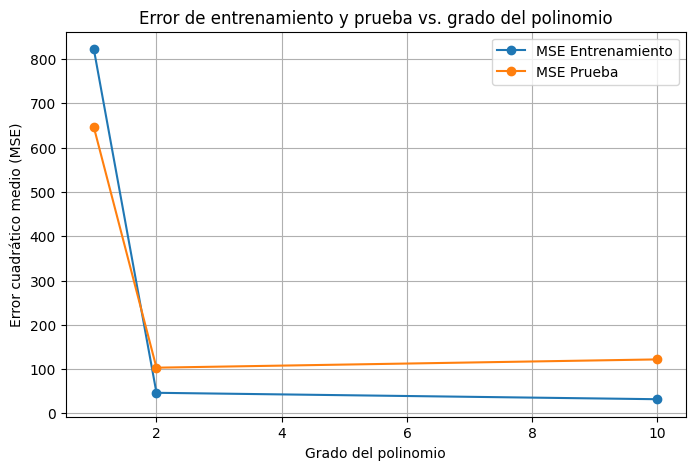

In [3]:
# Crear listas para los grados y los errores
grados = [g for g, _, _ in errores]
mse_train = [e_tr for _, e_tr, _ in errores]
mse_test = [e_te for _, _, e_te in errores]

plt.figure(figsize=(8,5))
plt.plot(grados, mse_train, marker='o', label='MSE Entrenamiento')
plt.plot(grados, mse_test, marker='o', label='MSE Prueba')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Error de entrenamiento y prueba vs. grado del polinomio')
plt.legend()
plt.grid(True)
plt.show()

# 2.- Validación cruzada con k folds

## Explicación

Funcionamiento:

- Dividir el dataset en k folds de tamaño aproximadamente igual (dividirlo en k muestras iguales aproximadamente). 

- Para cada fold:

a. Tomar ese fold como conjunto de prueba.

b. Tomar los k-1 folds restantes como conjunto de entrenamiento.

c. Entrenar el modelo con el conjunto de entrenamiento.

d. Evaluar el modelo con el conjunto de prueba y guardar la métrica.

- Repetir el paso 2 para los k folds (entrenar k veces el mismo conjunto de datos tomando una muestra diferente tanto de test como de entrenamiento)

- Calcular la media de las métricas de las k iteraciones para obtener la evaluación final.

En resumen, dividimos el conjunto de datos en k folds y entrenamos k veces el conjunto de datos con una muestra diferente de test para evaluarlo.

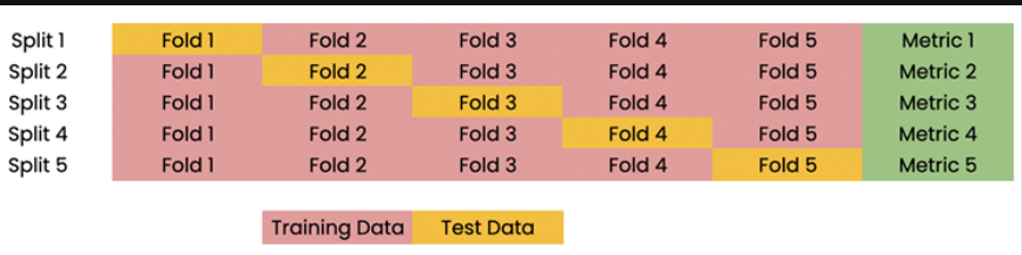

## Ejercicio 1

Tienes un conjunto de datos ficticios con información de clientes, donde se desea predecir si no van a pagar (1) o si (0), en función de variables numéricas.

Tu tarea es:

- Aplicar validación cruzada con 5 particiones (5-fold cross-validation) usando un modelo de clasificación.

- Mostrar los resultados obtenidos para cada fold (accuracy).

- Calcular y reportar el promedio de accuracy y su desviación estándar.

- Comparar los resultados con una única partición de train/test tradicional (por ejemplo, 70/30) y discutir la diferencia.

In [1]:
import pandas as pd
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. Crear modelo
model = KNeighborsClassifier(n_neighbors=3)

# 3. Validación cruzada con 5 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Accuracy por fold:", scores)
print("Accuracy promedio:", scores.mean())
print("Desviación estándar:", scores.std())

# 4. Comparación con train/test tradicional
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_simple = accuracy_score(y_test, y_pred)

print("Accuracy con partición 70/30:", acc_simple)


Accuracy por fold: [0.82369188 0.82412523 0.8271946  0.83072437 0.81660528]
Accuracy promedio: 0.8244682721951268
Desviación estándar: 0.0046715893835337
Accuracy con partición 70/30: 0.8212787723785167


- Accuracy por fold: 

Es el la precision global de cada uno de los 5 folds


- Accuracy promedio: 0.825

es el promedio de las 5 precisiones previas: suma de las 5 precisiones/5



- Desviación estándar: 0.0427

variacion respecto a la media (varia muy poco, tiene poca variabilidad)



- Accuracy con partición 70/30: 

creamos un modelo aparte con una division de 70-30 y comparamos el resultado obtenido por las validacion cruzada:

    - La validcion cruzada: 0.824
    - El modelo con 70-30: 0.821







| Resultado de CV vs Split único        | Interpretación                                                                                                                 |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Similares (como en tu caso)**       | Modelo robusto, buen sesgo-varianza. El modelo generaliza bien y no depende de un solo split.                                  |
| **CV ≫ Split único**                  | El modelo puede haber tenido mala suerte en ese 30% de prueba. Tal vez se enfrentó a datos más difíciles o no representativos. |
| **CV ≪ Split único**                  | Es posible que el split único haya sido afortunado (por casualidad). El modelo podría estar sobreajustando a esa partición.    |
| **Diferencia muy alta (±0.05 o más)** | Probablemente haya alta varianza en los datos. Requiere revisar el modelo o hacer más pruebas.                                 |




Confía más en la validación cruzada, porque:

- Promedia el rendimiento sobre varios splits.

- Reduce el sesgo de una sola partición.

- Es una estimación más estable y realista del rendimiento en datos no vistos.

# 3.- Leave-One-Out Cross Validation

## Explicación

El funcionamiento es:

- Para un dataset con n observaciones:

a. Tomar 1 observación como conjunto de prueba.

b. Tomar las n-1 observaciones restantes como conjunto de entrenamiento.

c. Entrenar el modelo con las n-1 observaciones.

d. Evaluar el modelo con la observación de prueba y guardar la métrica.


- Repetir el paso 1 para cada una de las n observaciones.

- Calcular la media de las métricas de las n iteraciones para obtener la evaluación final.

## Ejercicio 1

Se te proporciona un pequeño conjunto de datos sintéticos con 10 observaciones que relacionan el número de horas estudiadas (horas_estudio) con la calificación obtenida (calificacion). 
Tu tarea es usar LOOCV para estimar el error de generalización de un modelo de regresión lineal simple que predice la calificación a partir de las horas de estudio.

- Código que implemente Leave-One-Out Cross Validation desde cero (sin usar cross_val_score).

- Cálculo del error cuadrático medio (MSE) promedio obtenido por LOOCV.

- Análisis: ¿Qué ventaja ofrece LOOCV frente a una validación tradicional con train/test split en un conjunto tan pequeño?



In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Datos
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([2,4,1,8,7,12,9,13,14,15])

n = len(X)
errors = []

for i in range(n):
    # Separar datos de entrenamiento y prueba
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)
    X_test = X[i].reshape(1, -1)
    y_test = y[i]
    
    # Modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicción y error
    y_pred = model.predict(X_test)
    error = mean_squared_error([y_test], y_pred)
    errors.append(error)

# MSE promedio
loocv_mse = np.mean(errors)
print(f"Error cuadrático medio (LOOCV): {loocv_mse:.4f}")


Error cuadrático medio (LOOCV): 4.1085


# 4.- Stratified K-Fold

## Explicación

- Dividir el dataset en k folds, asegurando que la proporción de cada clase sea igual en todos los folds.

- Para cada fold:
a. Tomar ese fold como conjunto de prueba.
b. Tomar los k-1 folds restantes como conjunto de entrenamiento.
c. Entrenar el modelo con el conjunto de entrenamiento.
d. Evaluar el modelo con el conjunto de prueba y guardar la métrica.

- Repetir el paso 2 para los k folds.

- Calcular la media de las métricas de las k iteraciones para obtener la evaluación final.

"Es lo mismo que k-fold CV, pero ponderando proporcionalmente las clased"

Esto es especialmente útil en problemas de clasificación con clases desbalanceadas, donde algunas clases tienen muy pocas muestras.

Supongamos un dataset con 10 muestras:

Clase A: 6 muestras

Clase B: 4 muestras

Queremos k = 2 folds:

- Fold 1 → 3 muestras A + 2 muestras B

- Fold 2 → 3 muestras A + 2 muestras B

Cada fold tiene la misma proporción de clases que el dataset original: 60% A y 40% B.

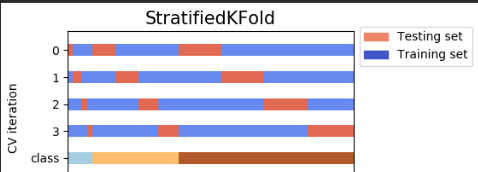

## Ejercicio 1

Se proporciona un conjunto de datos sintético que relaciona características de estudiantes con su rendimiento final (aprobó o no aprobó). Se desea predecir si un estudiante aprobará o no con base en el número de horas que estudia. 0 = No aprobó, 1 = Aprobó

- Implementación de Stratified K-Fold Cross Validation con K=5.

- Entrenamiento de un modelo de clasificación (por ejemplo, regresión logística).

- Cálculo del accuracy promedio.

- Comparación breve con una validación cruzada sin estratificar: ¿por qué podría ser menos confiable en este caso?

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Datos
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([0,0,0,1,0,1,1,1,1,1])

# Modelo
model = LogisticRegression()

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Resultados
print(f"Accuracy promedio (Stratified 5-Fold): {np.mean(accuracies):.4f}")


Accuracy promedio (Stratified 5-Fold): 0.8000


c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Usar Stratified K-Fold es útil porque asegura que cada subconjunto tenga representadas ambas clases (aprobó/no aprobó) de manera proporcional. Esto mejora la estabilidad del rendimiento medido, especialmente en conjuntos pequeños o desbalanceados.

Si usáramos un K-Fold normal, podríamos tener folds sin representantes de alguna clase, lo que sesgaría el entrenamiento o inflaría artificialmente la métrica.

Resumen

| Técnica                 | Cómo funciona                                                                                                                   | Ventajas                                                                                       | Desventajas                                                                                                       | Cuándo aplicarla                                                                                                                        |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **K-Fold CV**           | Divide el dataset en k folds; cada fold se usa una vez como prueba y los demás como entrenamiento.                              | Buena estimación de error, balance entre entrenamiento y prueba, eficiente computacionalmente. | Sensible a la distribución de datos en los folds.                                                                 | Dataset de tamaño moderado o grande, clasificación o regresión estándar, cuando no hay clases desbalanceadas extremas.                  |
| **Leave-One-Out (LOO)** | Cada observación se usa una vez como prueba y el resto como entrenamiento; se entrenan n modelos (n = número de observaciones). | Usa toda la información disponible para entrenamiento; menos sesgo de estimación.              | Muy costoso computacionalmente, especialmente para datasets grandes; puede aumentar la varianza de la estimación. | Dataset muy pequeño, cuando cada observación es valiosa y se quiere maximizar el uso de datos para entrenamiento.                       |
| **Stratified K-Fold**   | Igual que K-Fold, pero mantiene la proporción de clases en cada fold.                                                           | Evita sesgo en datasets desbalanceados; mejor estimación de métricas de clasificación.         | Más complejo de implementar que K-Fold estándar.                                                                  | Problemas de **clasificación con clases desbalanceadas**, donde es importante que cada fold refleje la distribución de clases original. |


# 5.- Regularización

## Explicación

La regularización en Machine Learning es una técnica que se usa para evitar el sobreajuste (overfitting) en los modelos.

Matemáticamente la regularización agrega un término de penalización al función de pérdida del modelo para limitar la complejidad

Función de pérdida regularizada = Función de pérdida original + $\lambda$ · Complejidad del modelo

Donde:

- $\lambda$ es un parámetro que controla cuánto queremos penalizar la complejidad.
- La complejidad se puede medir de diferentes maneras:
  - Ridge (L2): Complejidad = $\sum_j w_j^2$
  - Lasso (L1): Complejidad = $\sum_j |w_j|$


  En otras palabras, la regularización fuerza a que los coeficientes $w_j$ del modelo no sean demasiado grandes, evitando que el modelo “memorice” el ruido de los datos de entrenamiento.


En conclusión: podemos decir que la regularización simplifica la complejidad de un modelo y en algunos caso hace selección de caracteristicas por nosotros. Y matematicamente significa modificar la funcion de costes del modelo implementado. 

Nota: La modificación se hace sobre la función de costes, no sobre el modelo

Una metodologia para aplicar regularizacion:

https://chatgpt.com/share/6887da8f-bdf8-800a-ac61-cea666976322

## Ejercicio 1

Se te proporciona un conjunto de datos sintético generado con scikit-learn, el cual contiene 100 muestras y 30 variables predictoras. Solo 5 de estas variables influyen realmente en la variable objetivo, el resto son ruido.

Tu tarea es:

- Ajustar un modelo de regresión lineal sin regularización y evaluar su rendimiento.

- Ajustar un modelo Ridge (L2) y comparar sus resultados con el modelo sin regularización.

- Ajustar un modelo Lasso (L1) y observar qué coeficientes son reducidos a cero.

- Ajustar un modelo Elastic Net y usar validación cruzada para encontrar la mejor combinación de hiperparámetros alpha y l1_ratio.

- Comparar los errores (MSE) y los coeficientes obtenidos en cada caso.

- Concluir cuál es el modelo más adecuado para este tipo de problema y justificarlo.

📦 Entregables esperados

- Notebook o archivo .py con el código.

- Comentarios explicativos paso a paso.

- Tabla con los errores de validación (MSE o RMSE) de cada modelo.

- Gráfica de comparación de coeficientes.

- Conclusión escrita en máximo 10 líneas justificando qué técnica funcionó mejor y por qué.

Errores de prueba:
Lineal sin regularización: 292.30
Ridge: 345.70
Lasso: 798.30
Elastic Net: 294.25


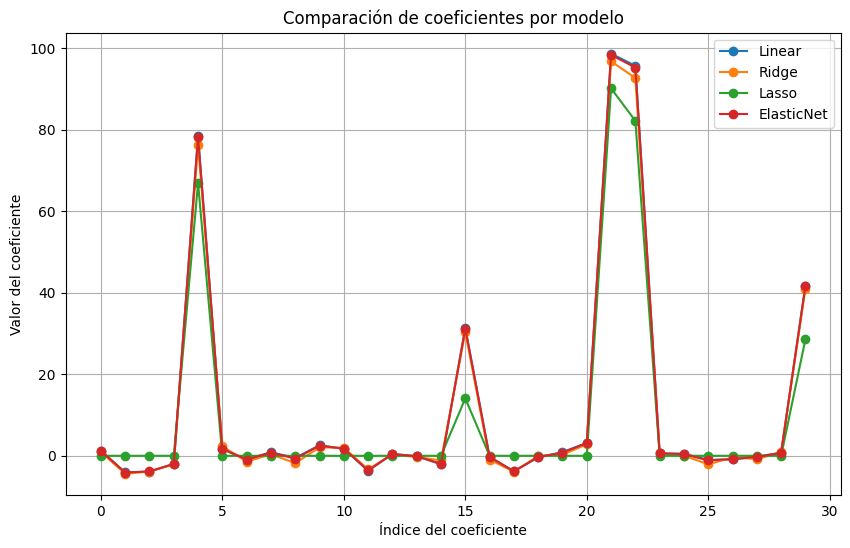

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Generación de datos sintéticos
X, y, coef = make_regression(n_samples=100, n_features=30, n_informative=5,
                             noise=10, coef=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modelo sin regularización
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# 3. Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 4. Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# 5. Elastic Net con búsqueda de hiperparámetros
param_grid = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}
elastic = ElasticNet(max_iter=10000)
grid = GridSearchCV(elastic, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)
best_elastic = grid.best_estimator_
y_pred_elastic = best_elastic.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

# 6. Comparación
print("Errores de prueba:")
print(f"Lineal sin regularización: {mse_lr:.2f}")
print(f"Ridge: {mse_ridge:.2f}")
print(f"Lasso: {mse_lasso:.2f}")
print(f"Elastic Net: {mse_elastic:.2f}")

# 7. Gráfica de coeficientes
plt.figure(figsize=(10,6))
plt.plot(lr.coef_, 'o-', label='Linear')
plt.plot(ridge.coef_, 'o-', label='Ridge')
plt.plot(lasso.coef_, 'o-', label='Lasso')
plt.plot(best_elastic.coef_, 'o-', label='ElasticNet')
plt.legend()
plt.title('Comparación de coeficientes por modelo')
plt.xlabel('Índice del coeficiente')
plt.ylabel('Valor del coeficiente')
plt.grid(True)
plt.show()


También podemos observar que de las 30 características son los 5 de éstas son realmente relevantes.

# 6.- Matriz de confusión

## Explicación

La matriz de confusión es una herramienta para evaluar el comportamiento y rendimiento de clases en un clasificador. Aquí daré la explicación de dos clases, pero se puede extrapolar a varias clase

Tenemos dos clases, clase positiva: 1 y clase negativa: 0. La elección de 0 y 1 es arbitraria, pero usualmente le damos el valor 1 a la positiva y cero a la negativa

Un modelo predice si un paciente tiene cáncer (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$


- Interpretación de las celdas:

        - TP verdaderos positivos: aquellas observaciones que son positivas y el modelo predijo como positivas (casos de éxito)
        - TN verdaderos negativos: aquellas observaciones que son negativas y se predijeron como negativas (casos de exito)
        - FN falsos negativos: aquellas observaciones que son positivas y se predijeron como negativas (casos de error) ERROR TIPO 2
        - FP falsos positivos: aquellas observaciones negativas que se predijeron como positivas (casos de error) ERROR TIPO 1



Se definen 4 métricas principales. Estas métricas se calculan para cada clase (en este caso solo para la clase 1 y cero)

- Precision global: Es el numero de predicciones correctas entre el numero de predicciones totales  TP+TN / TP+TN+FN+FP

Clase positiva:

- Precision de clase: TP / TP+FP

- Rcall o sensibilidad: TP / TP+FN

- F1 score:  Para este en realidad es $F_n$, en este cado es n=1

    $$
    F1 = 2 \cdot \frac{\frac{TP}{TP+FP} \cdot \frac{TP}{TP+FN}}{\frac{TP}{TP+FP} + \frac{TP}{TP+FN}}
    $$

    $$
    F1 = 2 \cdot \frac{Precision_{1} \cdot Recall_{1}}{Precision_{1} + Recall_{1}}
    $$


Clase negativa: 

- Precision de clase: TN / TN + FN

- Rcall o sensibilidad: TN / TN + FP

- F1 score:Para este en realidad es $F_n$, en este cado es n=1


    $$
    F1 = 2 \cdot \frac{\frac{TN}{TN+FN} \cdot \frac{TN}{TN+FP}}{\frac{TN}{TN+FN} + \frac{TN}{TN+FP}}
    $$

    $$
    F1 = 2 \cdot \frac{Precision_{0} \cdot Recall_{0}}{Precision_{0} + Recall_{0}}
    $$

Nota para f1 socre:
Tomemos la clase 1 como ejemplo y veamos la fórmula general y el comportamiento de $F_\beta$ score

$$
F_{\beta,1} = (1 + \beta^2) \cdot \frac{Precision_{1} \cdot Recall_{1}}{(\beta^2 \cdot Precision_{1}) + Recall_{1}}
$$


Tomemos valores de $F_{0.5,1,2}$

→ da más peso a la Precisión

$$
F_{0.5,1} = 1.25 \cdot \frac{Precision_{1} \cdot Recall_{1}}{0.25 \cdot Precision_{1} + Recall_{1}}
$$


→ balancea precisión y recall por igual (es el F1-score normal)

$$
F_{1,1} = 2 \cdot \frac{Precision_{1} \cdot Recall_{1}}{Precision_{1} + Recall_{1}}
$$


→da más peso al Recall

$$
F_{2,1} = 5 \cdot \frac{Precision_{1} \cdot Recall_{1}}{4 \cdot Precision_{1} + Recall_{1}}
$$


Analogamente con la clase cero

## Ejercicio 1

Se te han proporcionado los resultados de cinco modelos de clasificación, ya entrenados y evaluados en distintos sectores. Cada modelo ha generado una matriz de confusión.

Entregables esperados para cada caso:

1. Interpretación de la matriz:

    - ¿Qué representa cada celda?

    - ¿Cuál es la clase positiva?

    - ¿Qué error es más grave en este contexto?

2. Cálculo e interpretación de métricas:

    - ccuracy, Precision, Recall, F1-score (para la clase positiva).

    - Justificación del mejor modelo en función del contexto (costos, prioridades, riesgos) y las mejoras a realizar.



#### Caso 1 Detección de cáncer. 

Un modelo predice si un paciente tiene cáncer (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$


$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{20} & \text{5} \\
\hline
\text{Clase negativa (0)} & \text{10} & \text{85} \\
\hline
\end{array}
$$

1. 

- La clase positiva en "si tiene cancer"
- La clase negativa: "No tiene cáncer"


- Interpretación de las celdas:

        - TP verdaderos positivos: aquellos que tienen cáncer y el modelo predijo que efectivamente tenia cancer (aciertos)
        - TN verdaderos negativos: aquellos que no tienen cancer y se predijeron que efectivamente no tenias cancer (aciertos)
        - FN falsos negativos: aquellos que se predijeron como que no tiene cancer y en realidad si tienen cancer  (casos de error) ERROR TIPO 2  "predice no positivo, cuando es si positivo"
        - FP falsos positivos: aquellos que se predijeron como que si tienen cancer y en realidad no tienen cacner  (casos de error) ERROR TIPO 1 "predice si positivo, cuando es no positivo"


El error más grave en este contexto es decirle a un paciente que no tiene cáncer cuando si lo tiene (error tipo 2). 

2. 

Cálculo para la clase positiva (lo mismo se puede hacer con la negativa con sus respectivas fórmulas):

| Métrica de la clase 1     | Valor | Interpretación corregida                                                                                                                                                                            |
| ------------------------- | ----- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**              | 0.875 | Del total de predicciones (positivas y negativas), el modelo acierta correctamente en el **87.5% de los casos**. No distingue entre clases, mide la proporción global de aciertos.                  |
| **Precision**             | 0.667 | De todas las predicciones que el modelo hizo como *positivas* ("tiene cáncer"), el **66.7% realmente eran positivas**. Es decir, mide cuántos de los detectados como enfermos en verdad lo estaban. |
| **Recall (Sensibilidad)** | 0.8   | De todas las personas que **realmente tenían cáncer**, el modelo identificó correctamente al **80%**.                                                                                               |
| **F1 Score**              | 0.727 | Es el promedio armónico entre precisión y recall, y en este caso indica un **balance del 72.7% entre identificar correctamente enfermos y no generar demasiados falsos positivos (aquellos que se predicen positivos cuando en realidad son negativos)**.                 |




- Se debe buscar minimizar los falsos negativos, o equivalentemente, mejorar la sensibilidad de la clase 1 (aumentarla) y contrastarla de forma correcta con la precisión (tener el trade off óptimo):

$Rcall_{clasepositiva} = \frac{TP}{TP + FN}$

- A medida que diminuye FN, Rcall se hace más grande. Esto se interpreta como que debemos capturar a la mayor parte de verdaderos positivos aunque perdamos algunos verdaderos negativos.

- Es mejor menos riesgoso decirle a alguien que no tiene cancer cuando en realidad si lo tiene que decirle que si lo tiene cuando en realidad no lo tiene












#### Caso 2: Finanzas – Predicción de Morosos 

Modelo que predice si un cliente incumplirá su deuda (1) o no (0).

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 70 & 30 \\
\hline
\text{Clase negativa (0)} & 20 & 180 \\
\hline
\end{array}
$$


1. 

- La clase positiva en "es moroso"
- La clase negativa: "si cumple"


- Interpretación de las celdas:

        - TP verdaderos positivos: aquellos que son morosos (no pagan) y el modelo predijo que efectivamente no pagan (aciertos)
        - TN verdaderos negativos: aquellos que no son morosos (si pagan) y se predijeron que efectivamente si pagan (aciertos)
        - FN falsos negativos: aquellos que se predijeron como que no son morosos (si cumplen) y en realidad son morosos  (casos de error) ERROR TIPO 2  "predice no positivo, cuando es si positivo"
        - FP falsos positivos: aquellos que se predijeron como que si son morosos (no cumplen) y en realidad no son morosos (si cumplen)  (casos de error) ERROR TIPO 1 "predice si positivo, cuando es no positivo"


El error más grave en este contexto es considerar a los morosos como no morosos (error tipo 2). Pero también debemos de contrastar la pérdida que supone considerar a los que no son morosos como morosos (error tipo 1)

2. 

Cálculo para la clase positiva (lo mismo se puede hacer con la negativa con sus respectivas fórmulas):

| Métrica de la clase 1     | Valor | Interpretación corregida                                                                                                                                                                                                                                 |
| ------------------------- | ----- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**              | 0.833 | Del total de predicciones (positivas y negativas), el modelo acierta correctamente en el **83.3% de los casos**. No distingue entre clases, mide la proporción global de aciertos.                                                                       |
| **Precision**             | 0.778 | De todas las predicciones que el modelo hizo como *positivas* ("es moroso"), el **77.8% realmente eran positivas**. Es decir, mide cuántos de los detectados como morosos en verdad lo son.                                                              |
| **Recall (Sensibilidad)** | 0.700 | De todas las personas que **realmente son morosos**, el modelo identificó correctamente al **70%**.                                                                                                                                                      |
| **F1 Score**              | 0.737 | Es el promedio armónico entre precisión y recall, y en este caso indica un **balance del 73.7% entre identificar correctamente morosos y no generar demasiados falsos positivos (aquellos que se predicen positivos cuando en realidad son negativos)**. |





- Se debe buscar minimizar los falsos negativos, o equivalentemente, mejorar la sensibilidad de la clase 1 (aumentarla) y contrastarla de forma correcta con la precisión de la clase 2, pero se debe definir con el cliente qué es más valioso: detectar a los morosos o priorizar a los no morosos (ya que ambos pueden representar pérdidas, pero hay que contrastar cuál representa mayor pérdida y apartir de ahí empezar a mejorar el clasificador)




#### Caso 3: Logística – Fallas de Entrega

Contexto: Se predice si una entrega llegará a tiempo (1) o tendrá una falla (0).


$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 5 & 25 \\
\hline
\text{Clase negativa (0)} & 30 & 140 \\
\hline
\end{array}
$$


- La clase positiva en "llega a tiempo"
- La clase negativa: "no llega a tiempo"

- Interpretación de las celdas:

        - TP verdaderos positivos: aquellos que son morosos (no pagan) y el modelo predijo que efectivamente no pagan (aciertos)
        - TN verdaderos negativos: aquellos que no son morosos (si pagan) y se predijeron que efectivamente si pagan (aciertos)
        - FN falsos negativos: aquellos que se predijeron como que no son morosos (si cumplen) y en realidad son morosos  (casos de error) ERROR TIPO 2  "predice no positivo, cuando es si positivo"
        - FP falsos positivos: aquellos que se predijeron como que si son morosos (no cumplen) y en realidad no son morosos (si cumplen)  (casos de error) ERROR TIPO 1 "predice si positivo, cuando es no positivo"


El error más grave en este contexto es considerar a los morosos como no morosos (error tipo 2). Pero también debemos de contrastar la pérdida que supone considerar a los que no son morosos como morosos (error tipo 1)

2. 

Cálculo para la clase positiva (lo mismo se puede hacer con la negativa con sus respectivas fórmulas):

| Métrica de la clase 1     | Valor | Interpretación corregida                                                                                                                                                                                                                                 |
| ------------------------- | ----- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**              | 0.833 | Del total de predicciones (positivas y negativas), el modelo acierta correctamente en el **83.3% de los casos**. No distingue entre clases, mide la proporción global de aciertos.                                                                       |
| **Precision**             | 0.778 | De todas las predicciones que el modelo hizo como *positivas* ("es moroso"), el **77.8% realmente eran positivas**. Es decir, mide cuántos de los detectados como morosos en verdad lo son.                                                              |
| **Recall (Sensibilidad)** | 0.700 | De todas las personas que **realmente son morosos**, el modelo identificó correctamente al **70%**.                                                                                                                                                      |
| **F1 Score**              | 0.737 | Es el promedio armónico entre precisión y recall, y en este caso indica un **balance del 73.7% entre identificar correctamente morosos y no generar demasiados falsos positivos (aquellos que se predicen positivos cuando en realidad son negativos)**. |





- Se debe buscar minimizar los falsos negativos, o equivalentemente, mejorar la sensibilidad de la clase 1 (aumentarla) y contrastarla de forma correcta con la precisión de la clase 2, pero se debe definir con el cliente qué es más valioso: detectar a los morosos o priorizar a los no morosos (ya que ambos pueden representar pérdidas, pero hay que contrastar cuál representa mayor pérdida y apartir de ahí empezar a mejorar el clasificador)


#### Caso 4: Tecnología – Cancelación de Suscripciones


Contexto: Se predice si un usuario cancelará su suscripción (1) o la mantendrá (0).



$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 20 & 15 \\
\hline
\text{Clase negativa (0)} & 30 & 250 \\
\hline
\end{array}
$$


#### Caso 5: Educación – Deserción Estudiantil


Contexto: Se predice si un estudiante desertará del curso (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 30 & 40 \\
\hline
\text{Clase negativa (0)} & 10 & 160 \\
\hline
\end{array}
$$


# 7.- Reporte de clasificacion

## Explicación

Es un resumen de las métricas calculadas a partir de la matriz de confusión. Veamos un ejemplo concreto:

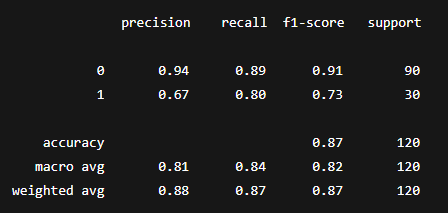



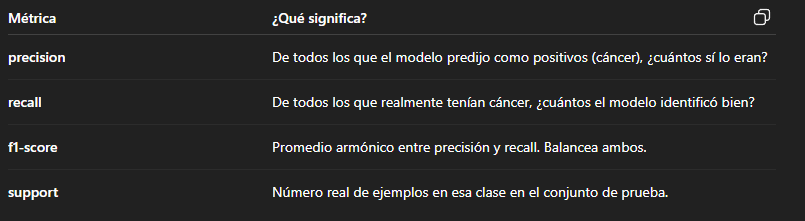

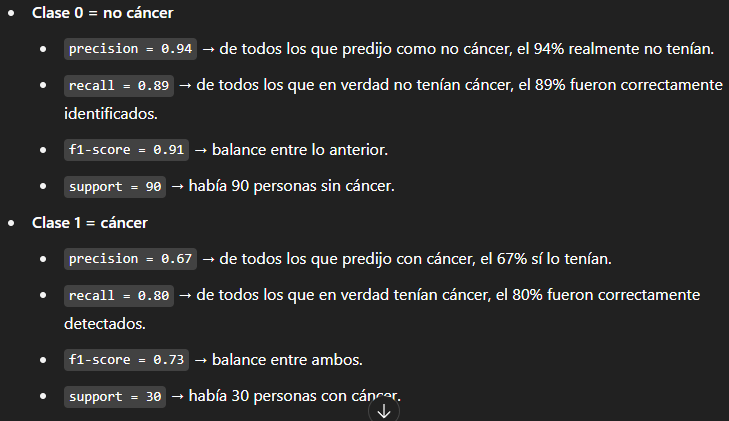

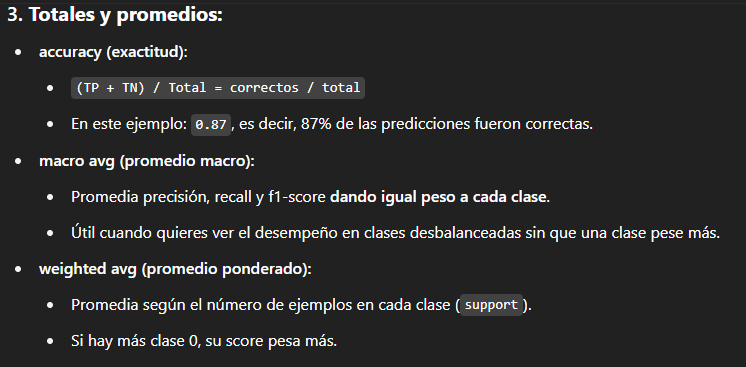

# 8.- Curva ROC y AUC

## Explicacion

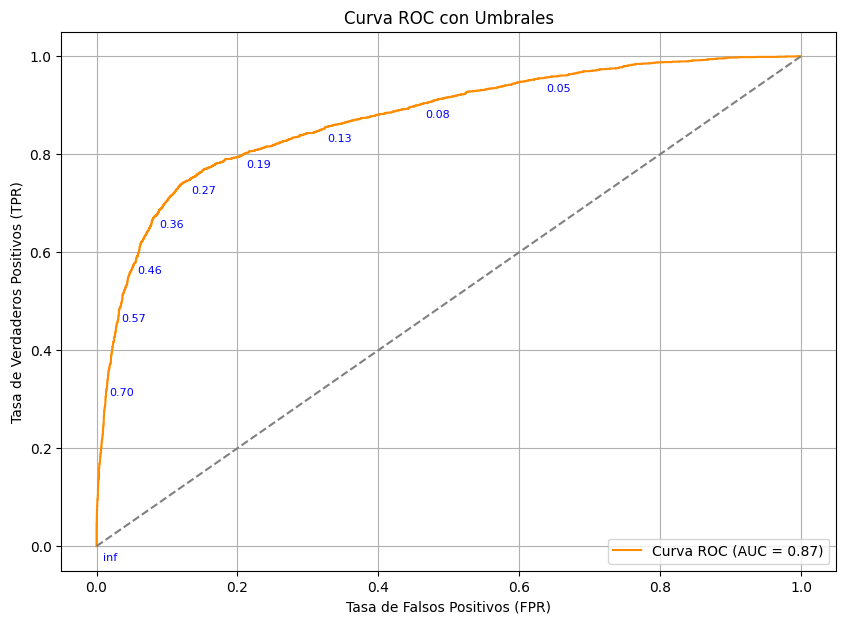

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Cargar datos
df_roc = pd.read_csv('df_encoded.csv')
X = df_roc.drop(columns='loan_status')
y = df_roc['loan_status']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)     
X_test = scaler.transform(X_test)

# Entrenar modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Probabilidades y métricas
y_proba = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Graficar curva ROC con umbrales anotados
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con Umbrales')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar algunos umbrales como anotaciones
for i in range(0, len(thresholds), len(thresholds)//10):
    plt.annotate(f'{thresholds[i]:.2f}', 
                 (fpr[i], tpr[i]), 
                 textcoords="offset points", 
                 xytext=(10, -10),
                 ha='center',
                 fontsize=8,
                 color='blue')

plt.show()


Recordemos que en una matriz de confusión:
- TN: verdaderos negativos
- TP: verdaderos positivos
- FP: falsos positivos (ose clasifican como positivos cuando son negativos)
- FN: falsos negativos (se clasifican como negativas cuando son positivos)

Donde:
- tasa de falsos positivos = 1 - tasa de verdaderos negativos (especifidad)

La curva ROC es una grafica de rcall (tasa de verdaderos positivos) vs tasa de falsos positivos.



| Valor AUC     | Interpretación                                         |
| ------------- | ------------------------------------------------------ |
| **1.0**       | Clasificación perfecta (modelo ideal).                 |
| **0.9 – 1.0** | Excelente capacidad de clasificación.                  |
| **0.8 – 0.9** | Muy buena.                                             |
| **0.7 – 0.8** | Aceptable, buena.                                      |
| **0.6 – 0.7** | Débil, bajo rendimiento.                               |
| **0.5 – 0.6** | Prácticamente aleatorio (similar a lanzar una moneda). |
| **0.5**       | Sin poder de discriminación (no distingue clases).     |
| **< 0.5**     | Peor que aleatorio (el modelo podría estar invertido). |



🧠 Interpretación práctica:

El AUC representa la probabilidad de que el modelo asigne una mayor probabilidad a una instancia positiva que a una negativa.

Por ejemplo:

Si AUC = 0.85, significa que hay un 85% de probabilidad de que el modelo clasifique correctamente una observación positiva por encima de una negativa.

# 8.1.- Precision vs sensibilidad

# Explicación

Es una grafica que compara, por clase, la precision vs sensibilidad

Cuándo usar cada una:

- Si las clases están balanceadas: la curva ROC es más estándar e interpretable.

- Si hay fuerte desbalance o te importa mucho la clase positiva: la curva Precisión–Sensibilidad es más interpretable y da una visión más realista.

# Ejercicio 1

Consideremos un dataset procesado y limpio para predecir morosos

## Curva presicion vs sensibilidad

En la curva podemos ver (para la clase 1, pero podemos hacer lo analogo con la clase 0):

- Variacion de la precision en funcion de la sensibilidad para algunos valores de umbrales


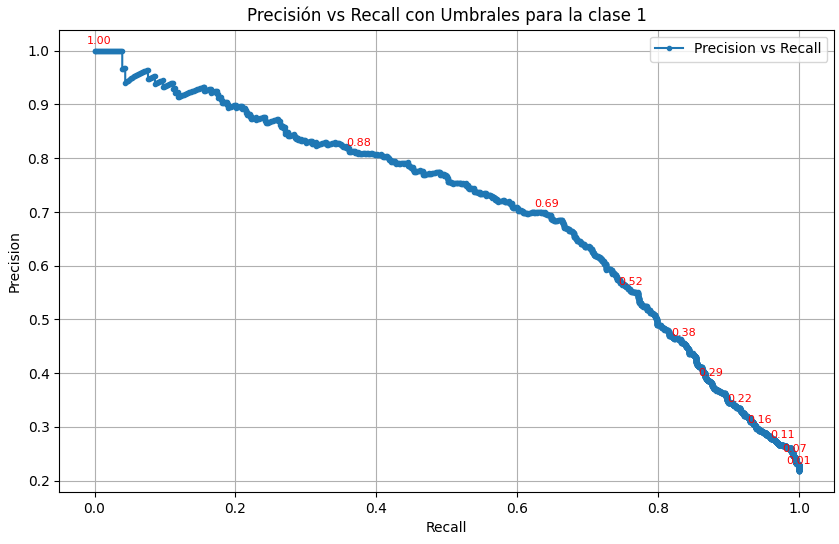

Aquí podemos ver lo mismo, pero para ambas clases

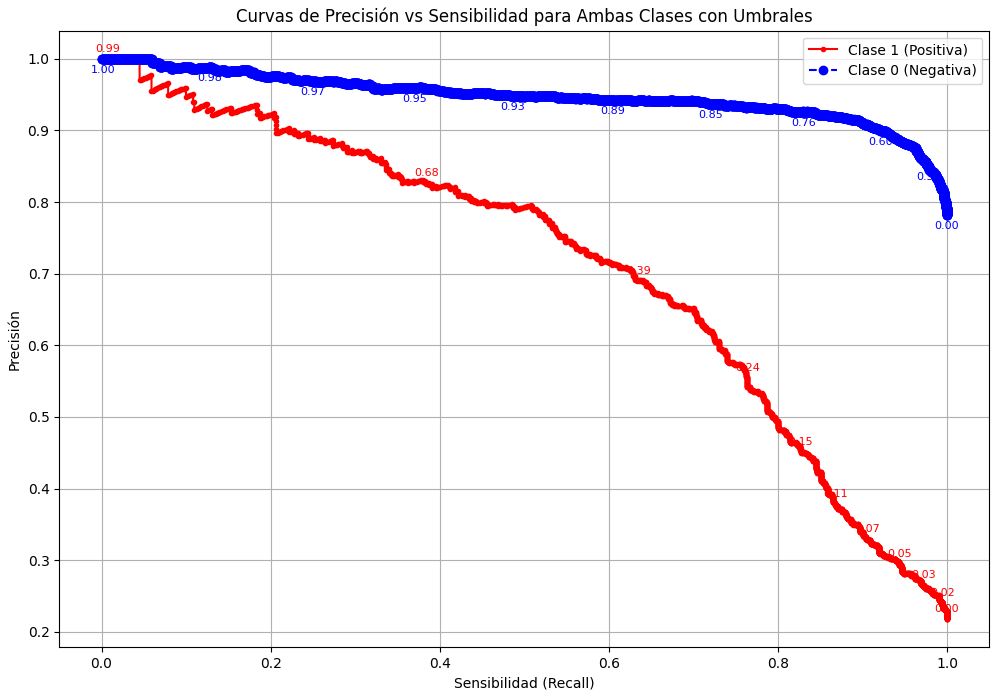

Ahora veamos los valores de precision y sensibilidad para ambas clases en funcion de umbrales

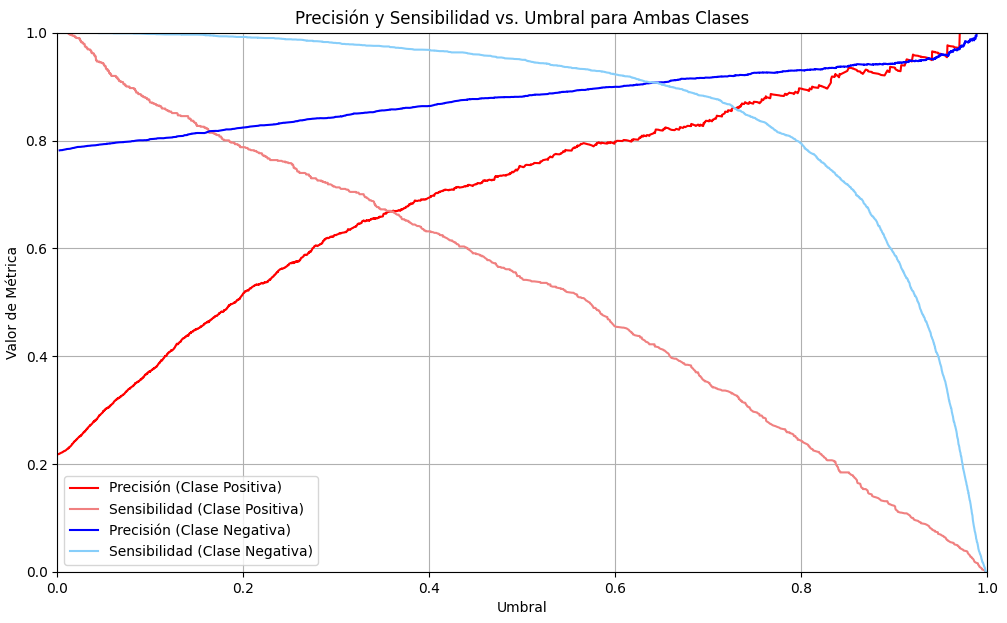

# 9.- Conjunto de validacion

 Consecuencias de no tener conjunto de validación:
1. Sobreajuste al conjunto de prueba
El modelo aprende patrones específicos del test set (incluyendo ruido).

Se vuelve bueno solo en ese conjunto, pero malo en datos nuevos reales (producción).

2. Métricas engañosas
Las métricas de rendimiento (accuracy, F1, etc.) en el test set ya no son confiables.

Parecen más altas de lo que deberían porque el modelo fue ajustado con esa información.

3. Evaluación final sesgada
El test set deja de ser una evaluación honesta.

No puedes saber realmente cuán bien generaliza tu modelo.

4. Comparaciones entre modelos incorrectas
No puedes comparar de forma justa varios modelos o configuraciones.

Cualquier decisión basada en el test set estará contaminada.

5. Pérdida de capacidad de generalización
El modelo final puede tener alto rendimiento en el test set, pero fallar en producción.

6. Malas decisiones de negocio o implementación
Si implementas un modelo basado en ese test set contaminado, podrías tomar decisiones erróneas que afecten resultados reales.



🎯 Objetivo del ejercicio:

El objetivo de este ejercicio es comprender la función y utilidad de los subconjuntos de entrenamiento, validación y prueba al momento de entrenar y evaluar modelos de machine learning. Deberás:

- Realizar la correcta división del dataset.

- Entrenar un modelo de clasificación usando solo el conjunto de entrenamiento.

- Usar el conjunto de validación para ajustar hiperparámetros o evaluar diferentes modelos.

- Utilizar el conjunto de prueba para obtener una evaluación final del rendimiento del modelo óptimo seleccionado.

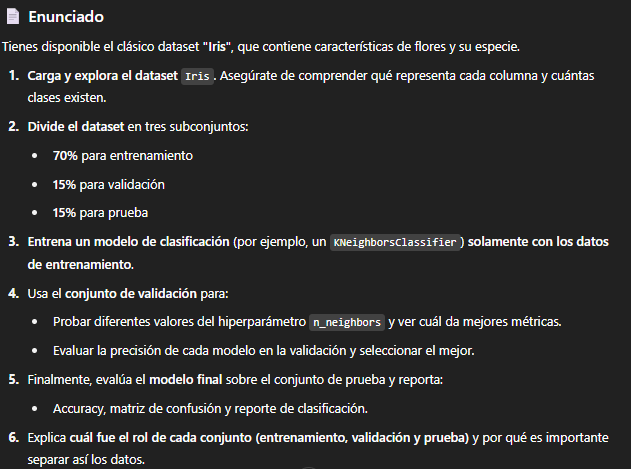

- Entrenamiento: el modelo aprende patrones.

- Validación: se ajustan los hiperparámetros o se comparan modelos sin tocar los datos de prueba.

- Prueba: evaluación final. Nunca se debe usar durante entrenamiento ni ajustes.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. División de datos (70% entrenamiento, 15% validación, 15% prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)
#x_temp representa un subconjunto temporal de los datos que se utiliza para dividir posteriormente en validación y prueba.

# Verificar tamaños
print(f"Entrenamiento: {len(X_train)}, Validación: {len(X_val)}, Prueba: {len(X_test)}")




Entrenamiento: 22806, Validación: 4887, Prueba: 4888


In [3]:
# 3. Entrenar varios modelos con diferentes k usando validación
results = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    results.append((k, acc))

# 4. Resultados en validación
df_results = pd.DataFrame(results, columns=["k", "validation_accuracy"])
display(df_results)

# Elegir el mejor modelo
best_k = df_results.sort_values(by="validation_accuracy", ascending=False).iloc[0]['k']
print(f"Mejor k encontrado: {int(best_k)}")

# 5. Entrenamiento final y evaluación en prueba
final_model = KNeighborsClassifier(n_neighbors=int(best_k))
final_model.fit(X_train, y_train)
test_preds = final_model.predict(X_test)

print("Accuracy en prueba:", accuracy_score(y_test, test_preds))
print("Matriz de confusión:\n", confusion_matrix(y_test, test_preds))
print("Reporte de clasificación:\n", classification_report(y_test, test_preds))

,k,validation_accuracy
0,1,0.815838
1,2,0.833231
2,3,0.825046
3,4,0.835482
4,5,0.836096
5,6,0.841211
6,7,0.838961
7,8,0.841211
8,9,0.839984
9,10,0.838756


Mejor k encontrado: 8
Accuracy en prueba: 0.8351063829787234
Matriz de confusión:
 [[3622  199]
 [ 607  460]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      3821
           1       0.70      0.43      0.53      1067

    accuracy                           0.84      4888
   macro avg       0.78      0.69      0.72      4888
weighted avg       0.82      0.84      0.82      4888



En este ejercicio noté que entrenar el modelo y evaluarlo en los mismos datos da una idea falsa de su rendimiento. Al usar el conjunto de validación, pude comparar versiones del modelo sin afectar la evaluación final. El conjunto de prueba me sirvió para tener una estimación realista de cómo se comportará mi modelo en datos nuevos.

# 10.- Búsqueda en cuadrícula

| **Criterio**                 | **Grid Search**                                                                      | **Random Search**                                                                 |
| ---------------------------- | ------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------- |
| **Descripción**              | Explora todas las combinaciones posibles de un conjunto definido de hiperparámetros. | Muestra combinaciones aleatorias de los hiperparámetros definidos.                |
| **Uso típico en algoritmos** | SVM, Ridge, Lasso, Árboles pequeños, KNN                                             | Random Forest, Gradient Boosting (XGBoost, LightGBM), Redes Neuronales, etc.      |
| **Eficiencia computacional** | Lenta cuando hay muchos hiperparámetros o combinaciones posibles                     | Más eficiente al explorar un espacio amplio con menos combinaciones               |
| **Cobertura del espacio**    | Exhaustiva dentro de un rango limitado                                               | Aleatoria; puede cubrir mejor el espacio si algunas variables son más sensibles   |
| **Escenarios recomendados**  | Cuando el espacio de búsqueda es pequeño o bien definido                             | Cuando hay muchos hiperparámetros o combinaciones posibles                        |
| **Parámetros continuos**     | Poco eficiente: requiere discretizarlos                                              | Muy útil: permite muestreo continuo                                               |
| **Ventajas**                 | - Prueba todas las combinaciones<br>- Resultados reproducibles                       | - Más rápido<br>- Puede encontrar buenas combinaciones más rápido                 |
| **Desventajas**              | - Costoso computacionalmente<br>- No escala bien                                     | - Resultados no reproducibles sin semilla<br>- Puede ignorar buenas combinaciones |
| **Soporte en librerías**     | `GridSearchCV` (sklearn), `GridSearch` (Keras Tuner)                                 | `RandomizedSearchCV` (sklearn), `RandomSearch` (Keras Tuner)                      |


#### Metodologia para aplicar búsqueda en cuadrícula

Aquí hay una metodología para aplicar grid search;

https://chatgpt.com/share/6887d965-c530-800a-9331-f31a77e1f7b1

Ejercicio 1

📝 Enunciado:

Cuentas con un dataset procesado (df_encoded.csv) que contiene información sobre solicitudes de préstamos, y una variable objetivo llamada loan_status que indica si el préstamo fue pagado o no.

El objetivo de este ejercicio es aplicar búsqueda en cuadrícula (GridSearchCV) para encontrar la mejor combinación de hiperparámetros para un modelo de regresión logística, optimizando la métrica de precisión.

🎯 Actividades:

1. Carga el dataset y separa las variables predictoras X y la variable objetivo y.

2. Divide los datos en conjunto de entrenamiento y prueba (80% - 20%).

3. Aplica búsqueda en cuadrícula con GridSearchCV usando un modelo de regresión logística (LogisticRegression).

4. Define una grilla de hiperparámetros que explore los siguientes valores:

    - penalty: ['l1', 'l2']

    - C: [0.01, 0.1, 1, 10]

    - solver: ['liblinear'] (usa este solver para que funcione con L1 y L2)

5. Reporta:

    - La mejor combinación de hiperparámetros

    - La precisión obtenida en el conjunto de prueba con ese mejor modelo 

    📦 Entregables esperados:

    Código con el proceso completo

    Impresión de los mejores hiperparámetros

    Precisión en el conjunto de prueba usando el mejor estimador

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Cargar datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Definir el modelo base
logreg = LogisticRegression(max_iter=1000)

# 4. Definir la grilla de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

# 5. Aplicar búsqueda en cuadrícula
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6. Resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# 7. Evaluación en test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", test_accuracy)




Mejores hiperparámetros encontrados: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Precisión en el conjunto de prueba: 0.8620530919134571


Qué hace c a la regresion logistica?

C es el inverso de la fuerza de regularización:

$C = 1/λ$

λ es el parámetro de regularización (como en Ridge o Lasso).

| Valor de `C` | Regularización | Efecto en el modelo                                                     |
| ------------ | -------------- | ----------------------------------------------------------------------- |
| **Grande**   | Débil (poca)   | El modelo intenta ajustarse más a los datos (riesgo de **overfitting**) |
| **Pequeño**  | Fuerte         | El modelo es más simple (riesgo de **underfitting**)                    |


# 11.- Busqueda aleatoria

# 12.- KNN

# 13.- Selección de características 

# 14.- Pipeline

✅ ¿Qué es un pipeline en ciencia de datos?
Un pipeline automatiza y organiza el flujo de trabajo completo, desde la recolección de datos hasta la generación de resultados, permitiendo:

- Reproducibilidad

- Escalabilidad

- Mantenimiento más sencillo

- Automatización de tareas repetitivas


🔄 Etapas comunes en un pipeline de ciencia de datos

1. Ingesta de datos

Recolectar datos desde bases de datos, archivos, APIs, sensores, etc.

2. Limpieza de datos

Eliminar valores nulos, duplicados, outliers, etc.

3. Transformación / ingeniería de características

Codificación, normalización, extracción de variables, agregaciones

4. Análisis exploratorio (EDA)

Estadísticas descriptivas, visualizaciones

5. Entrenamiento de modelos

Algoritmos de machine learning, selección de modelos, validación

6. Evaluación

Métricas como accuracy, RMSE, AUC, etc.

7. Despliegue

Modelo en producción (API, aplicación web, etc.)

8. Monitoreo

Validación continua del rendimiento del modelo


In [ ]:
# Ingesta de datos
import pandas as pd

# Cargar datos desde archivo CSV
df = pd.read_csv('credit_risk_dataset.csv')

# Mostrar las primeras filas
df.head()


#--------------------------------------

# Limpieza de datos
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar columnas con muchos valores nulos si existen (opcional)
# df.drop(['columna_con_muchos_nulos'], axis=1, inplace=True)

# Rellenar o eliminar valores nulos
df = df.dropna()  # alternativa: df.fillna(method='ffill')

# Eliminar duplicados
df = df.drop_duplicates()

# Detección y tratamiento de outliers con z-score (opcional)
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# Verificar forma del dataframe limpio
df.shape


#--------------------------------------

# Transformación / Ingeniería de características
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Codificación de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalización de variables numéricas
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop('loan_status', axis=1).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Separar características (X) y variable objetivo (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']


#--------------------------------------

#Análisis exploratorio de datos (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
sns.countplot(x=y)
plt.title("Distribución de loan_status")
plt.show()

# Correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# Boxplots para detectar outliers
for col in numeric_cols[:5]:  # limitar a 5 columnas para no sobrecargar
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


#--------------------------------------

#Entrenamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo (puedes cambiar por otros modelos)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



#-----------------------------------------


# Evaluación del modelo

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


#-----------------------------------------

# despliegue

# Guarda el modelo entrenado
import joblib
joblib.dump(model, 'modelo_credit_risk.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Código básico de API con Flask
from flask import Flask, request, jsonify

app = Flask(__name__)
model = joblib.load('modelo_credit_risk.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    X_input = pd.DataFrame([data])
    X_input[numeric_cols] = scaler.transform(X_input[numeric_cols])
    prediction = model.predict(X_input)[0]
    return jsonify({'loan_status': int(prediction)})

# Ejecutar: flask run


#-------------------------------------
#momitoreo

# Ejemplo básico: guardar métricas de predicción periódicamente
import datetime

def log_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    timestamp = datetime.datetime.now().isoformat()
    
    with open("model_metrics.log", "a") as f:
        f.write(f"{timestamp}, accuracy: {acc:.4f}, auc: {auc:.4f}\n")

# Llamar luego de cada lote de predicción
log_metrics(y_test, y_pred)


# 15.- Evaluar múltiples modelos